> 시계열 분석을 정리하고자 한다. 머신러닝과 딥러닝을 이용한 시계열 분석에 대해 알아보자. 다만 각 모델에 대해서는 간단히 다룬다.

# 예측(Forecasting)

## Facebook Prophet

## SVM, Ensemble(Bagging, Boosting)

**Support Vector Machine**

<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/7/72/SVM_margin.png/300px-SVM_margin.png' width=200>

<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/f/fe/Kernel_Machine.svg/1920px-Kernel_Machine.svg.png' width=400>

- 최대 마진 분류기: SVM의 주요 목표는 데이터 클래스 간에 최대 마진(margin)을 가지는 결정 경계(decision boundary)를 찾는 것이다. 마진은 결정 경계와 가장 가까운 훈련 샘플 사이의 거리를 의미하며, 이 샘플들을 서포트 벡터(support vectors)라고 한다.
  - 목적 함수: $\min_{w, b} \frac{1}{2} \|w\|^2$
  - 제약 조건: $y_i (w \cdot x_i + b) \geq 1, \quad \forall i$
- 커널 트릭: 선형으로 분리가 불가능한 데이터셋에 대해서 SVM은 커널 트릭(kernel trick)을 사용하여 특성 공간을 고차원으로 매핑한다(다항 커널, RBF(Radial Basis Function, 방사 기저 함수) 커널 등)
  
- 소프트 마진 분류: 일부 오분류를 허용하는 소프트 마진 분류 방법을 사용한다. 하이퍼파라미터 C를 사용하여 제어할 수 있으며, C가 크면 마진 오류를 더 적게 허용하고, C가 작으면 더 많은 마진 오류를 허용한다.

- 단점: scale에 민감

**Bagging - Random Forest**

<img src="https://upload.wikimedia.org/wikipedia/commons/c/c7/Randomforests_ensemble.gif">

- 앙상블 학습: 랜덤 포레스트는 여러 개의 결정 트리를 조합하여 사용합니다. 각 트리는 독립적으로 학습되며, 최종 예측은 트리들의 예측 결과를 평균내거나 가장 많이 선택된 클래스로 결정한다(분류의 경우).

- 부트스트랩 샘플링(Bootstrap sampling): 각 결정 트리는 전체 훈련 데이터셋에서 무작위로 선택된 데이터 샘플을 사용하여 훈련된다. 이 샘플링 방식을 부트스트랩 샘플링이라고 하며, 각 트리는 부트스트랩된 샘플로 구성된 서브셋을 이용해 훈련된다.

- 특성의 무작위 선택(Feature Randomness): 각 노드에서 최적의 분할을 결정할 때, 전체 특성이 아닌 무작위로 선택된 일부 특성만 고려한다. 이로 인해 트리 간의 상관관계가 감소하고, 모델의 다양성이 증가하여 과적합을 방지한다.

**Boosting - Gradient Boosting**

<img src="https://media.geeksforgeeks.org/wp-content/uploads/20200721214745/gradientboosting.PNG" width=600>

그래디언트 부스팅(Gradient Boosting)은 앙상블 학습 기법 중 하나로, 여러 개의 약한 학습기(weak learners)를 순차적으로 학습시켜 강력한 예측 모델을 만드는 방법이다. 이 방법은 주로 결정 트리를 약한 학습기로 사용하며, 각 단계에서 이전 학습기의 잔차(residual errors)를 줄이는 방향으로 학습을 진행한다.

- 손실 함수 최소화: 그래디언트 부스팅은 주어진 손실 함수를 최소화하기 위해 설계되었다. 
- 초기화: 첫 번째 학습기를 통해 간단한 예측 모델(예: 평균, 중앙값 등)을 만든다. $\rightarrow$ 반복 학습: 이후 각 단계에서 이전 모델의 잔차를 목표로 새로운 학습기를 훈련한다. $\rightarrow$ 모델 업데이트: 각 학습기의 결과를 가중합하여 최종 모델을 업데이트합니다. 각 단계의 학습기는 이전 모델의 그래디언트를 사용하여 학습된다.
- 학습률(Learning Rate): 각 학습기의 기여도를 조절하는 학습률을 도입하여 모델의 변동성을 감소시키고, 더 안정적인 학습을 유도한다.

- 단점: 과적합에 약함

**XGBoost**

<img src='./img/xgboost.png' width=400>

- 성능과 속도: XGBoost는 병렬 처리와 트리 가지치기(Tree Pruning)를 통해 고속으로 실행되며, 전통적인 그래디언트 부스팅 기법보다 빠르며, 큰 데이터셋에서도 빠르게 학습할 수 있다.
- 정규화: XGBoost는 모델 복잡성에 대한 정규화 항목을 포함하여 과적합을 방지한다. 
- 가지치기: XGBoost는 깊이 우선 접근 방식을 사용하여 트리를 확장하고, 손실 기능이 개선되지 않으면 트리 성장을 조기에 중단한다. 이는 과적합을 줄인다.
- 결측치 처리: XGBoost는 내부적으로 결측치를 처리할 수 있는 기능을 가지고 있다. 사용자가 각 특성의 결측치를 어떻게 처리할지 지정할 수 있으며, 자동으로 최적의 방향을 찾는다.
- 사용자 정의 가능성: 사용자는 손실 함수를 자유롭게 정의할 수 있으며, 이를 최적화하는 방향으로 알고리즘을 조정할 수 있다. 이는 XGBoost를 다양한 문제에 맞춰 유연하게 사용할 수 있게 한다.

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import xgboost as xgb

tn = 10000
dates = pd.date_range('20200101', periods=tn)

data = pd.DataFrame(np.random.randn(tn, 5), index=dates)

# y 생성
noise = np.random.normal(0, 0.5, tn)
data['y'] = ((2 * data[0]/data[1] - 1.5 * data[2]**2 + noise) > 0).astype(int)

# 데이터 분할
X = data.drop('y', axis=1)
y = data['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 모델 학습 및 평가
def train_evaluate(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    
    # 성능 지표 계산
    accuracy = accuracy_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)
    conf_matrix = confusion_matrix(y_test, predictions)

    # 결과 출력
    print(f'Accuracy of {model.__class__.__name__}: {accuracy:.2f}')
    print(f'F1 Score of {model.__class__.__name__}: {f1:.2f}')
    print(f'Confusion Matrix of {model.__class__.__name__}:\n{conf_matrix}\n')
    print('')

# SVC
svc_model = SVC()
train_evaluate(svc_model, X_train_scaled, y_train, X_test_scaled, y_test)

# Random Forest
rf_model = RandomForestClassifier(random_state=42)
train_evaluate(rf_model, X_train, y_train, X_test, y_test)

# XGBoost
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
train_evaluate(xgb_model, X_train, y_train, X_test, y_test)

Accuracy of SVC: 0.90
F1 Score of SVC: 0.85
Confusion Matrix of SVC:
[[1232   78]
 [ 124  566]]


Accuracy of RandomForestClassifier: 0.94
F1 Score of RandomForestClassifier: 0.92
Confusion Matrix of RandomForestClassifier:
[[1251   59]
 [  55  635]]


Accuracy of XGBClassifier: 0.94
F1 Score of XGBClassifier: 0.91
Confusion Matrix of XGBClassifier:
[[1235   75]
 [  45  645]]




## RNN, LSTM, GRU

RNN(Recurrent Neural Network)과 그 변형들인 LSTM(Long Short-Term Memory)과 GRU(Gated Recurrent Unit)는 순차 데이터나 시계열 데이터를 처리하는 데 특화된 신경망 구조이다.

**RNN (Recurrent Neural Network)**

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/b5/Recurrent_neural_network_unfold.svg/1920px-Recurrent_neural_network_unfold.svg.png" width=500>

RNN은 순차적인 정보를 처리하기 위해 고안된 신경망으로, 내부에 반복되는 네트워크 구조를 가진다. 이 구조는 시퀀스의 각 요소를 차례대로 처리하며, 각 시점에서의 출력이 다음 시점의 입력에 영향을 미친다.

- 메모리: 이전 정보를 일정 기간 동안 기억할 수 있는 '메모리' 기능을 가지고 있어, 시간에 따른 데이터의 패턴을 학습할 수 있다.
- 파라미터 공유: 시간에 따라 동일한 가중치를 사용함으로써 학습해야 할 파라미터 수를 줄이고, 공간적 효율성을 높인다.

- 단기 기억 문제: 긴 시퀀스를 처리할 때 초기 입력 정보가 망각되는 경향이 있다(장기 의존성 문제).
- 그래디언트 소실 및 폭발: 시간이 길어질수록 그래디언트가 소실되거나 폭발할 수 있는 문제가 발생한다.

**LSTM (Long Short-Term Memory)**

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/6/63/Long_Short-Term_Memory.svg/1920px-Long_Short-Term_Memory.svg.png" width=500>

LSTM은 RNN의 장기 의존성 문제를 해결하기 위해 고안된 구조로, 정보를 장기간에 걸쳐 저장하거나 삭제할 수 있는 게이트가 포함되어 있다.

- 구조
  - 입력 게이트: 정보를 셀 상태에 추가할지 말지 결정
  - 망각 게이트: 셀 상태에서 어떤 정보를 버릴지 결정
  - 출력 게이트: 셀 상태의 어떤 부분을 출력할지 결정

- 장기 기억: 중요한 정보를 긴 시간 동안 기억할 수 있다.

- 그래디언트 안정성: 게이트를 통해 그래디언트의 소실과 폭발 문제를 크게 완화한다.

**GRU (Gated Recurrent Unit)**

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/5f/Gated_Recurrent_Unit.svg/1920px-Gated_Recurrent_Unit.svg.png" width=500>

GRU는 LSTM의 간소화된 버전으로, 성능은 유지하면서 계산을 더 효율적으로 만들고자 설계되었다.

- 구조
  - 리셋 게이트: 과거 정보를 얼마나 무시할지 결정
  - 업데이트 게이트: 새로운 정보를 얼마나 많이 받아들일지, 과거 정보를 얼마나 유지할지 결정

- 계산 효율성: LSTM에 비해 더 적은 계산을 요구하며, 비교적 적은 양의 데이터로도 좋은 성능을 발휘할 수 있다.

In [16]:
import tensorflow as tf

In [17]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, LSTM, GRU, Dense
from tensorflow.keras.optimizers import Adam

X_train_scaled = scaler.fit_transform(X_train).reshape(-1, 1, 5)
X_test_scaled = scaler.transform(X_test).reshape(-1, 1, 5)

# 모델 정의 함수
def build_model(model_type):
    model = Sequential()
    if model_type == 'RNN':
        model.add(SimpleRNN(50, input_shape=(1, 5), activation='tanh'))
    elif model_type == 'LSTM':
        model.add(LSTM(50, input_shape=(1, 5), activation='tanh'))
    elif model_type == 'GRU':
        model.add(GRU(50, input_shape=(1, 5), activation='tanh'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# 모델 학습 및 평가
def train_evaluate(model_type):
    model = build_model(model_type)
    model.fit(X_train_scaled, y_train, epochs=30, verbose=0)
    loss, accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)
    print(f'{model_type} Model Accuracy: {accuracy:.2f}')

train_evaluate('RNN')
train_evaluate('LSTM')
train_evaluate('GRU')

RNN Model Accuracy: 0.93
LSTM Model Accuracy: 0.94
GRU Model Accuracy: 0.94


## Transformer

트랜스포머(Transformer)는 주로 자연어 처리(NLP) 분야에서 사용되는 신경망 아키텍처로, 2017년 구글의 "Attention is All You Need" 논문을 통해 소개되었다. 트랜스포머는 어텐션 메커니즘을 사용하여 전체 입력 데이터를 한 번에 처리하는 방식을 채택한다.

<img src="https://upload.wikimedia.org/wikipedia/commons/8/8f/The-Transformer-model-architecture.png" width=500>

- 어텐션 메커니즘
  - 셀프 어텐션(Self-Attention): 하나의 시퀀스 내에서 각 요소가 서로 얼마나 영향을 미치는지를 학습한다. 각 단어는 다른 모든 단어와의 관계를 통해 자신의 출력을 조정한다.
  - 멀티 헤드 어텐션(Multi-Head Attention): 셀프 어텐션을 다양한 방식으로 동시에 수행하여, 서로 다른 시각에서 정보를 추출하고 결합한다. 이는 모델이 다양한 표현을 학습할 수 있도록 돕는다.

- 포지셔널 인코딩(Positional Encoding)
  - 트랜스포머는 입력 데이터의 시퀀스 순서에 대한 정보가 없기 때문에, 각 입력 요소에 포지셔널 인코딩을 추가하여 위치 정보를 제공한다.

- 인코더 디코더 구조
  - 인코더: 입력 시퀀스를 처리하여 연속적인 표현을 생성한다. 트랜스포머는 이러한 인코더를 여러 층으로 쌓아 구성한다.
  - 디코더: 인코더의 출력과 이전 디코더의 출력을 받아 다음 출력 시퀀스 요소를 생성한다. 디코더 역시 멀티 헤드 어텐션과 피드포워드 신경망으로 구성된다.

- 장점
  - 병렬 처리: RNN과 달리 트랜스포머는 입력 데이터를 한 번에 처리할 수 있어 GPU를 활용한 대규모 병렬 처리가 가능하다.
  - 장거리 의존성 학습: 셀프 어텐션 메커니즘 덕분에, 문장 내 먼 거리에 위치한 요소 간의 관계도 효과적으로 학습할 수 있다.

In [23]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,  MultiHeadAttention, LayerNormalization, Dropout, Flatten

X_train_scaled = scaler.fit_transform(X_train).reshape(-1, 10, 5)  # 10 타임스텝, 5 피처
X_test_scaled = scaler.transform(X_test).reshape(-1, 10, 5)

# Transformer 레이어 구성
def transformer_encoder(inputs):
    # Multi-head attention
    attn_output = MultiHeadAttention(num_heads=2, key_dim=5)(inputs, inputs)
    attn_output = Dropout(0.1)(attn_output)
    out1 = LayerNormalization(epsilon=1e-6)(inputs + attn_output)

    # Feed-forward network
    ffn_output = Dense(20, activation="relu")(out1)
    ffn_output = Dense(inputs.shape[-1])(ffn_output)
    ffn_output = Dropout(0.1)(ffn_output)
    return LayerNormalization(epsilon=1e-6)(out1 + ffn_output)

# 모델 정의
input_layer = Input(shape=(10, 5))
x = transformer_encoder(input_layer)
x = transformer_encoder(x)
x = Flatten()(x)
output_layer = Dense(1, activation='sigmoid')(x)
model = Model(inputs=input_layer, outputs=output_layer)
model.compile(optimizer=Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])

# 모델 학습
y_train_adjusted = y_train[::10]
y_test_adjusted = y_test[::10]
model.fit(X_train_scaled, y_train_adjusted, epochs=100, verbose=0)
loss, accuracy = model.evaluate(X_test_scaled, y_test_adjusted, verbose=0)
print(f'Transformer Model Accuracy: {accuracy:.2f}')

Transformer Model Accuracy: 0.83


# 이상탐지(Anomaly Detection)

## Autoencoders

Autoencoder는 입력 데이터를 효과적으로 압축하고 재구성하는 신경망 아키텍처로, 비지도 학습에 주로 사용된다. 이 모델은 입력 데이터를 낮은 차원의 표현으로 압축하는 인코더 부분과, 이 압축된 표현을 다시 원래의 데이터로 재구성하는 디코더 부분으로 구성된다.

Autoencoder의 기본 구조

- 인코더(Encoder): 입력 데이터 $x$를 받아들여, 그 데이터의 특징을 포착하는 내부 표현 $z$를 생성한다. 이 과정에서 원본 데이터보다 낮은 차원의 공간으로 데이터를 압축한다.
  
- 디코더(Decoder): 인코더에서 생성된 내부 표현 $z$를 사용하여 원본 데이터와 같은 차원의 출력$x'$를 재구성한다. 디코더의 목표는 인코더에서 압축된 정보를 사용해 원본 데이터 $x$를 가능한 한 정확하게 복원하는 것이다.
  
- 손실 함수(Loss function): 재구성된 데이터$x'$와 원본 데이터 $x$ 사이의 차이를 측정한다. 일반적으로 사용되는 손실 함수는 Mean Squared Error (MSE)이다.

Autoencoder의 활용
- 이상 탐지(Anomaly Detection): 정상 데이터만을 사용해 Autoencoder를 훈련시키면, 훈련되지 않은 이상 데이터는 재구성 오류가 크게 나타나므로 이상치를 감지하는 데 사용할 수 있다.

In [24]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, RepeatVector, TimeDistributed, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# 데이터 생성 함수
def generate_data(timesteps, num_samples=1000, anomaly=False):
    data = []
    for _ in range(num_samples):
        x = np.linspace(0, 2 * np.pi, timesteps)
        if anomaly and np.random.rand() > 0.95:  # 5%의 이상치 생성
            signal = np.sin(x) + np.random.normal(size=(timesteps,)) * 0.5 + 5  # 이상치 추가
        else:
            signal = np.sin(x) + np.random.normal(size=(timesteps,)) * 0.5
        data.append(signal)
    return np.array(data)

# 데이터 준비
timesteps = 50
num_samples = 3000
data = generate_data(timesteps, num_samples)
data_anomaly = generate_data(timesteps, 100, anomaly=True)

# 데이터 스케일링
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)
data_anomaly_scaled = scaler.transform(data_anomaly)

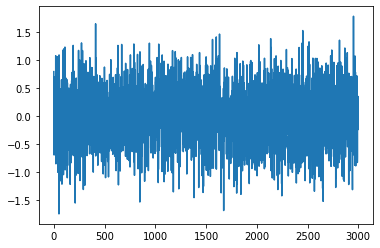

In [32]:
plt.plot(data[:,0])

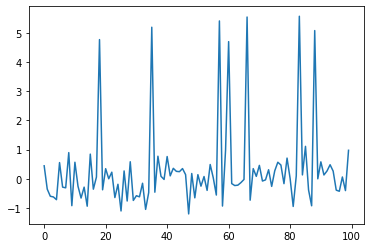

In [34]:
plt.plot(data_anomaly[:,0])

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 50, 1)]           0         
                                                                 
 lstm_3 (LSTM)               (None, 50, 128)           66560     
                                                                 
 lstm_4 (LSTM)               (None, 64)                49408     
                                                                 
 repeat_vector (RepeatVecto  (None, 50, 64)            0         
 r)                                                              
                                                                 
 lstm_5 (LSTM)               (None, 50, 64)            33024     
                                                                 
 lstm_6 (LSTM)               (None, 50, 128)           98816     
                                                           

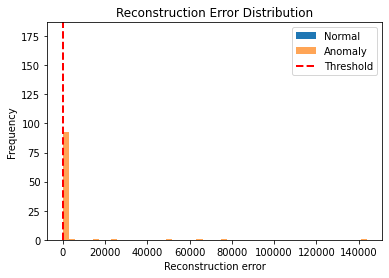

In [35]:
# Autoencoder 모델
input_seq = Input(shape=(timesteps, 1))
encoded = LSTM(128, activation='relu', return_sequences=True)(input_seq)
encoded = LSTM(64, activation='relu', return_sequences=False)(encoded)
decoded = RepeatVector(timesteps)(encoded)
decoded = LSTM(64, activation='relu', return_sequences=True)(decoded)
decoded = LSTM(128, activation='relu', return_sequences=True)(decoded)
decoded = TimeDistributed(Dense(1))(decoded)

autoencoder = Model(input_seq, decoded)
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
autoencoder.summary()

# 모델 학습
history = autoencoder.fit(data_scaled.reshape(-1, timesteps, 1), data_scaled.reshape(-1, timesteps, 1),
                          epochs=50, batch_size=128, validation_split=0.2, verbose=1)

# 이상 감지
reconstructions = autoencoder.predict(data_scaled.reshape(-1, timesteps, 1))
reconstruction_errors = np.mean(np.abs(data_scaled.reshape(-1, timesteps, 1) - reconstructions), axis=1)
threshold = np.mean(reconstruction_errors) + 2 * np.std(reconstruction_errors)

# 이상치 데이터 테스트
reconstructions_anomaly = autoencoder.predict(data_anomaly_scaled.reshape(-1, timesteps, 1))
reconstruction_errors_anomaly = np.mean(np.abs(data_anomaly_scaled.reshape(-1, timesteps, 1) - reconstructions_anomaly), axis=1)

# 결과 시각화
plt.hist(reconstruction_errors, bins=50, label='Normal')
plt.hist(reconstruction_errors_anomaly, bins=50, label='Anomaly', alpha=0.7)
plt.axvline(threshold, color='r', linewidth=2, linestyle='dashed', label='Threshold')
plt.legend()
plt.xlabel('Reconstruction error')
plt.ylabel('Frequency')
plt.title('Reconstruction Error Distribution')
plt.show()

*.. 작성중 ..*